# Analyse des Sentiments sur les r√©seaux sociaux : interview de Poutine et Carlson du 09/02/2024

### Objectifs : 
- Traitement du langage naturel (NLP) : utilisez des techniques de NLP avanc√©es, telles que l'analyse des sentiments, la mod√©lisation de sujets et la d√©tection des √©motions, pour d√©couvrir des mod√®les et des sentiments sous-jacents. Outils : BERT et GPT.
- Apprentissage automatique : utilisez des algorithmes d'apprentissage automatique pour classer les commentaires, pr√©dire les scores de sentiment et analyser les mesures d'engagement.
- Visualisation des donn√©es : cr√©ez des visualisations convaincantes pour repr√©senter les distributions de sentiments.

### Description des colonnes :
- Commentaire : Le contenu textuel du commentaire de l'utilisateur.
- Auteur anonymis√© : une repr√©sentation hach√©e SHA-256 du nom d'utilisateur de l'auteur du commentaire pour garantir la confidentialit√©.
- Publi√© √† : Horodatage indiquant la date √† laquelle le commentaire a √©t√© publi√©.
- J'aime : Le nombre de likes re√ßus par un commentaire.
- Nombre de r√©ponses : Le nombre de r√©ponses au commentaire.


Nous analysons ces donn√©es de mani√®re objective pour mieux comprendre le sentiment public sur les grandes questions mondiales, mettant en valeur la capacit√© de la science des donn√©es √† √©clairer les complexit√©s du discours humain.

### Importation des biblioth√®ques

In [7]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings  # Utilis√© pour supprimer les avertissements g√™nants

### Chargement et description des donn√©es

In [9]:
df = pd.read_csv('putin_tucker.csv')
df.describe(include='all').transpose()

count  unique  \
Comment              100000     401   
Anonymized Author    100000  100000   
Published At         100000     403   
Likes              100000.0     NaN   
Reply Count        100000.0     NaN   

                                                                 top  freq  \
Comment                                                            ‚ù§  1994   
Anonymized Author  533fb31af87a0ff551c4dc7a73634ccf7e9005f8eb4673...     1   
Published At                                    2024-02-17T22:32:34Z   997   
Likes                                                            NaN   NaN   
Reply Count                                                      NaN   NaN   

                       mean         std  min  25%  50%   75%      max  
Comment                 NaN         NaN  NaN  NaN  NaN   NaN      NaN  
Anonymized Author       NaN         NaN  NaN  NaN  NaN   NaN      NaN  
Published At            NaN         NaN  NaN  NaN  NaN   NaN      NaN  
Likes              52.22723  310.010713  0.0  0.0  2.0  11.0  79514.0  
Reply Count         2.38692    7.695083  0.0  0.0  0.0   1.0    750.0

### Distribution des commentaires uniques

Text(0, 0.5, 'Repetition count')

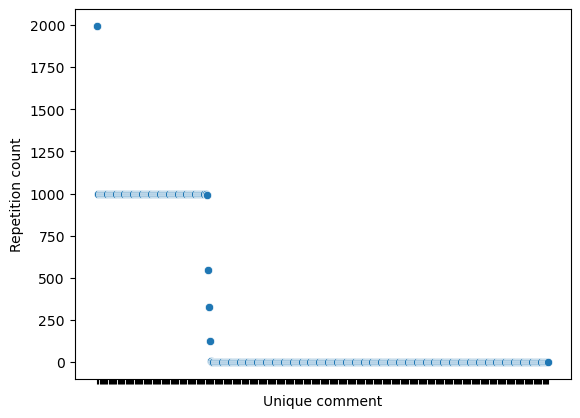

In [11]:
# Calculer le nombre de r√©p√©titions de chaque commentaire
unique_comment_dist = df.groupby('Comment')['Anonymized Author'].count().sort_values(ascending=False)

# Obtenir les valeurs uniques et leurs fr√©quences
uc_values, uc_counts = np.unique(unique_comment_dist.values, return_counts=True)

# Cr√©er un DataFrame pour visualiser les r√©sultats
uc_df = pd.DataFrame({
    'Number of comments with the same text': uc_values,
    'Number of unique comment contents that have this number of repetitions': uc_counts
})

# Afficher le DataFrame sous forme de tableau HTML
from IPython.display import display, HTML
display(HTML(uc_df.to_html(index=False)))

# Visualisation des r√©p√©titions des commentaires uniques
plot = sns.scatterplot(unique_comment_dist)
plot.set_xticklabels([])
plot.set_xlabel('Unique comment')
plot.set_ylabel('Repetition count')

### Cr√©ation de l'indicateur 'IsBotComment'

In [13]:
# Bas√© sur le graphique en dispersion ci-dessus, cr√©ons un indicateur 'IsBotComment'
df['DEV__IsBotComment'] = df['Comment'].isin(unique_comment_dist[unique_comment_dist > 1].index)

# Compter les occurrences de l'indicateur 'IsBotComment'
df['DEV__IsBotComment'].value_counts()

DEV__IsBotComment
True     99702
False      298
Name: count, dtype: int64

### Histogrammes des "Likes" pour les commentaires r√©els et les commentaires de bots

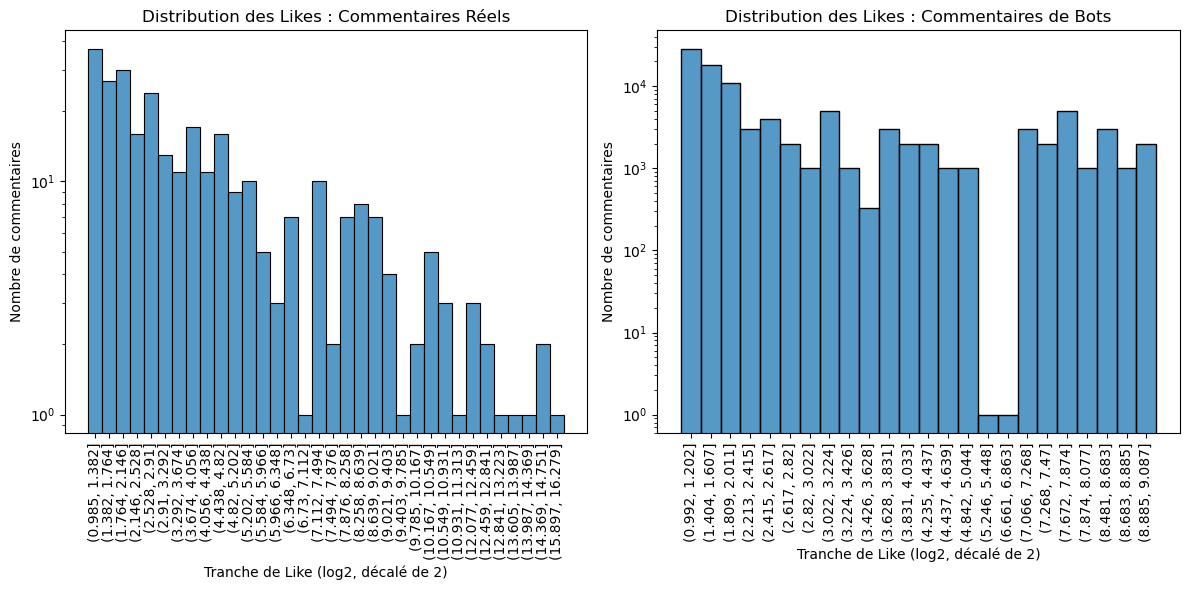

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Histogramme des commentaires r√©els
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    
    # Distribution des "Likes" pour les commentaires r√©els (d√©cal√©s de 2 pour √©viter le log de z√©ro)
    bucketed_like_counts_real = pd.cut(np.log2(df[~df['DEV__IsBotComment']]['Likes'].sort_values() + 2), bins=40).astype(str)
    sns.histplot(bucketed_like_counts_real, ax=axs[0])
    axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=90)
    axs[0].set_yscale('log')
    axs[0].set_xlabel('Tranche de Like (log2, d√©cal√© de 2)')
    axs[0].set_ylabel('Nombre de commentaires')
    axs[0].set_title('Distribution des Likes : Commentaires R√©els')
    
# Histogramme des commentaires de bots
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    
    # Distribution des "Likes" pour les commentaires de bots (d√©cal√©s de 2 pour √©viter le log de z√©ro)
    bucketed_like_counts_bot = pd.cut(np.log2(df[df['DEV__IsBotComment']]['Likes'].sort_values() + 2), bins=40).astype(str)
    sns.histplot(bucketed_like_counts_bot, ax=axs[1])
    axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=90)
    axs[1].set_yscale('log')
    axs[1].set_xlabel('Tranche de Like (log2, d√©cal√© de 2)')
    axs[1].set_ylabel('Nombre de commentaires')
    axs[1].set_title('Distribution des Likes : Commentaires de Bots')

# Ajuster la mise en page et afficher les graphiques
plt.tight_layout()
plt.show()

### Description des "Likes" sur les commentaires r√©els

In [17]:
df[~df['DEV__IsBotComment']]['Likes'].describe(percentiles=[.25, .75, .9, .95, .99]).rename('Likes on real comments')

count      298.000000
mean       766.218121
std       5224.981883
min          0.000000
25%          2.000000
50%          8.000000
75%         52.500000
90%        477.200000
95%       1414.650000
99%      19898.090000
max      79514.000000
Name: Likes on real comments, dtype: float64

### Description des "Likes" sur les commentaires de bots

In [19]:
df[df['DEV__IsBotComment']]['Likes'].describe(percentiles=[.25, .75, .9, .95, .99]).rename('Likes on bot comments')

count    99702.000000
mean        50.093178
std        116.362272
min          0.000000
25%          0.000000
50%          2.000000
75%         11.000000
90%        214.000000
95%        389.000000
99%        471.000000
max        542.000000
Name: Likes on bot comments, dtype: float64

### Pr√©paration des donn√©es pour les commentaires r√©els et les commentaires de bots

Pour les commentaires r√©els :

In [21]:
df_gen = df[~df['DEV__IsBotComment']].drop(['DEV__IsBotComment', 'Published At', 'Anonymized Author'], axis=1)

Pour les commentaires de bots :

In [25]:
df_bot = df[df['DEV__IsBotComment']].drop(['DEV__IsBotComment', 'Published At', 'Anonymized Author'], axis=1)

### Analyse des commentaires de bots

Pour un examen manuel ult√©rieur :

In [27]:
df_bot_unique = df_bot.groupby('Comment').agg(['mean', 'count'])

Pour l'analyse s√©mantique :

In [29]:
df_bot_unique_df = pd.DataFrame({
    'Likes': df_bot_unique['Likes']['mean'],
    'Reply Count': df_bot_unique['Reply Count']['mean']
}).reset_index()

### T√©l√©chargement des ressources nltk

In [31]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

### Pr√©paration des ressources NLTK et initialisation des outils

In [32]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer

# T√©l√©chargement des donn√©es NLTK n√©cessaires
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')

# Correction de bug Kaggle. √âchoue autrement.
import subprocess
wordnet_path = '/usr/share/nltk_data/corpora/wordnet.zip'
command = f"unzip {wordnet_path} -d /usr/share/nltk_data/corpora/"
subprocess.run(command.split())
nltk.data.path.append('/usr/share/nltk_data')

# V√©rification du t√©l√©chargement de WordNet
from nltk.corpus import wordnet as wn
print(wn.ensure_loaded())

# Initialisation du lemmatizer
lemmatizer = WordNetLemmatizer()

# Initialisation de l'analyseur de sentiment
sia = SentimentIntensityAnalyzer()

# D√©finition de la fonction de pr√©traitement du texte
def preprocess_text(text):
    # Tokenisation du texte
    tokens = word_tokenize(text.lower())
    
    # Suppression des mots vides
    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]
    
    # Lemmatization des tokens
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    
    # Reconstitution des tokens en cha√Æne de caract√®res
    processed_text = ' '.join(lemmatized_tokens)
    
    return processed_text

[nltk_data] Downloading package punkt to /Users/user/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/user/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/user/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
unzip:  cannot find or open /usr/share/nltk_data/corpora/wordnet.zip, /usr/share/nltk_data/corpora/wordnet.zip.zip or /usr/share/nltk_data/corpora/wordnet.zip.ZIP.


None


### Fonction d'analyse des commentaires dans un DataFrame

In [35]:
def analyze_comment_df(df):
    df = df.copy()
    df['DEV__PreprocessedComment'] = df['Comment'].apply(preprocess_text)
    df['DEV__Sentiment'] = df['DEV__PreprocessedComment'].apply(lambda text: sia.polarity_scores(text))
    for arg in ['neg', 'neu', 'pos', 'compound']:
        df['DEV__Sentiment__' + arg] = df['DEV__Sentiment'].apply(lambda x: x[arg])
    return df.drop('DEV__Sentiment', axis=1)

### Analyse descriptive du DataFrame des commentaires r√©els apr√®s traitement

In [37]:
df_gen_res = analyze_comment_df(df_gen)
df_gen_res.describe().transpose()

count        mean          std     min      25%  \
Likes                     298.0  766.218121  5224.981883  0.0000  2.00000   
Reply Count               298.0   18.077181    87.847956  0.0000  0.00000   
DEV__Sentiment__neg       298.0    0.074651     0.133683  0.0000  0.00000   
DEV__Sentiment__neu       298.0    0.643470     0.254890  0.0000  0.46225   
DEV__Sentiment__pos       298.0    0.281859     0.255651  0.0000  0.00000   
DEV__Sentiment__compound  298.0    0.293348     0.450565 -0.9428  0.00000   

                             50%       75%         max  
Likes                     8.0000  52.50000  79514.0000  
Reply Count               1.0000   3.00000    750.0000  
DEV__Sentiment__neg       0.0000   0.12100      0.7920  
DEV__Sentiment__neu       0.6320   0.83750      1.0000  
DEV__Sentiment__pos       0.2520   0.44875      1.0000  
DEV__Sentiment__compound  0.3612   0.65970      0.9903

### Analyse descriptive du DataFrame des commentaires de bots apr√®s traitement

In [39]:
df_bot_res = analyze_comment_df(df_bot_unique_df)
df_bot_res.describe().transpose()

count       mean         std     min    25%     50%  \
Likes                     103.0  49.451456  115.427520  0.0000  0.000  2.0000   
Reply Count               103.0   2.276757    5.924668  0.0000  0.000  0.0000   
DEV__Sentiment__neg       103.0   0.066612    0.115845  0.0000  0.000  0.0000   
DEV__Sentiment__neu       103.0   0.691417    0.272033  0.0000  0.507  0.6870   
DEV__Sentiment__pos       103.0   0.232272    0.239874  0.0000  0.000  0.1870   
DEV__Sentiment__compound  103.0   0.257709    0.412521 -0.6416  0.000  0.2023   

                              75%       max  
Likes                     11.0000  542.0000  
Reply Count                1.0000   35.0000  
DEV__Sentiment__neg        0.1185    0.5650  
DEV__Sentiment__neu        1.0000    1.0000  
DEV__Sentiment__pos        0.3840    0.8700  
DEV__Sentiment__compound   0.6249    0.9723

### Distribution du sentiment des commentaires apr√®s traitement

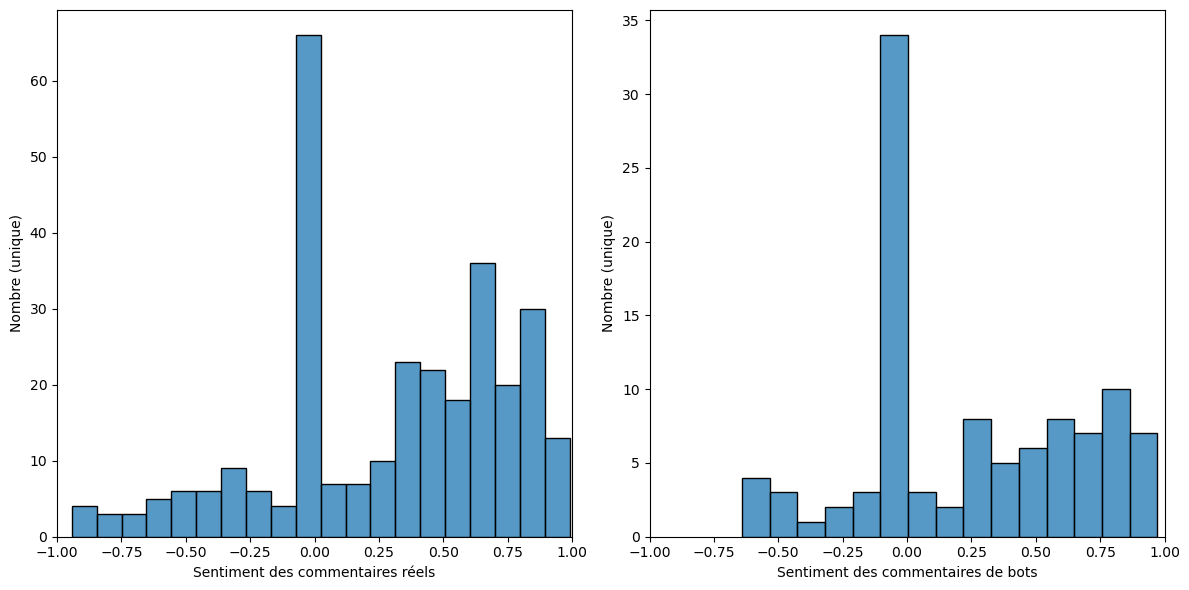

In [41]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    
    sns.histplot(df_gen_res['DEV__Sentiment__compound'], ax=axs[0], bins=20)
    axs[0].set_xlabel('Sentiment des commentaires r√©els')
    axs[0].set_ylabel('Nombre (unique)')  # Solidarit√© avec le deuxi√®me graphique.
    axs[0].set_xlim(-1, 1)
    
    sns.histplot(df_bot_res['DEV__Sentiment__compound'], ax=axs[1], bins=15)
    axs[1].set_xlabel('Sentiment des commentaires de bots')
    axs[1].set_ylabel('Nombre (unique)')  # Nous ne nous soucions pas des commentaires dupliqu√©s ici.
    axs[1].set_xlim(-1, 1)
    
plt.tight_layout()
plt.show()

### Pr√©paration des donn√©es des commentaires de bots pour l'analyse

In [43]:
df_bot_unique_flatindex = df_bot_unique.copy()
df_bot_unique_flatindex.columns = df_bot_unique_flatindex.columns.map('_'.join)
df_bot_unique_flatindex['count'] = df_bot_unique_flatindex['Likes_count']
df_bot_unique_flatindex = df_bot_unique_flatindex.drop(['Likes_count', 'Reply Count_count'], axis=1)
df_bot_unique_flatindex = df_bot_unique_flatindex.sort_values(by=['count', 'Likes_mean'], ascending=False).reset_index()

### Fusion et affichage des donn√©es des commentaires de bots

In [45]:
# Avertissement, sortie volumineuse ci-dessous.
merged_bot_df = df_bot_unique_flatindex.merge(df_bot_res, on='Comment')

# Affichage du DataFrame complet
with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.max_colwidth', None):
    display(merged_bot_df)

Comment  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         ‚ù§   
1                                                                                                                                                                                                                                                                                                                                                           In the time it took me to watch this in 1.5x speed the views went from 500k to over 1.7 million.  People are starving for real dialogue and real news. They want to hear things from the horses mouth instead of being fed what others think they should hear.  Whether what he said was true or not we want to hear both sides of the story. Great job Tucker!   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       Cant wait to see how the press spins this tomorrow.   
3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    Im Russian but I prefer to watch this in English in order to understand has Putins speech been translated correctly. So far Im satisfied with translation good work, still watching. Guys forward & repost this video.   
4                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      Thank you Tucker for allowing him to speak without you interrupting.   
5                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

### Analyse des commentaires de bots uniques

In [47]:
ut_df = df.groupby('Comment').nunique()
ut_df = ut_df[ut_df['Anonymized Author'] > 1]  # Les auteurs sont uniques, donc c'est essentiellement un identifiant.

display(ut_df[ut_df['Published At'] > 1])  # Commentaires de bots qui n'ont PAS √©t√© publi√©s tous en m√™me temps.
display(ut_df[ut_df['Likes'] > 1])  # Commentaires de bots qui n'ont pas exactement le m√™me nombre de likes.
display(ut_df[ut_df['Reply Count'] > 1])  # Commentaires de bots qui n'ont pas exactement le m√™me nombre de r√©ponses.

Anonymized Author  \
Comment                                                                 
The look on Tucker's face at the end of intervi...                  2   
‚ù§                                                                1994   

                                                    Published At  Likes  \
Comment                                                                   
The look on Tucker's face at the end of intervi...             2      2   
‚ù§                                                              2      1   

                                                    Reply Count  \
Comment                                                           
The look on Tucker's face at the end of intervi...            2   
‚ù§                                                             1   

                                                    DEV__IsBotComment  
Comment                                                                
The look on Tucker's face at the end of intervi...                  1  
‚ù§                                                                   1

Anonymized Author  \
Comment                                                                 
The look on Tucker's face at the end of intervi...                  2   

                                                    Published At  Likes  \
Comment                                                                   
The look on Tucker's face at the end of intervi...             2      2   

                                                    Reply Count  \
Comment                                                           
The look on Tucker's face at the end of intervi...            2   

                                                    DEV__IsBotComment  
Comment                                                                
The look on Tucker's face at the end of intervi...                  1

Anonymized Author  \
Comment                                                                 
First I am an Air Force Veteran and  Republican...                997   
The look on Tucker's face at the end of intervi...                  2   

                                                    Published At  Likes  \
Comment                                                                   
First I am an Air Force Veteran and  Republican...             1      1   
The look on Tucker's face at the end of intervi...             2      2   

                                                    Reply Count  \
Comment                                                           
First I am an Air Force Veteran and  Republican...            2   
The look on Tucker's face at the end of intervi...            2   

                                                    DEV__IsBotComment  
Comment                                                                
First I am an Air Force Veteran and  Republican...                  1  
The look on Tucker's face at the end of intervi...                  1

### Analyser des motifs temporels

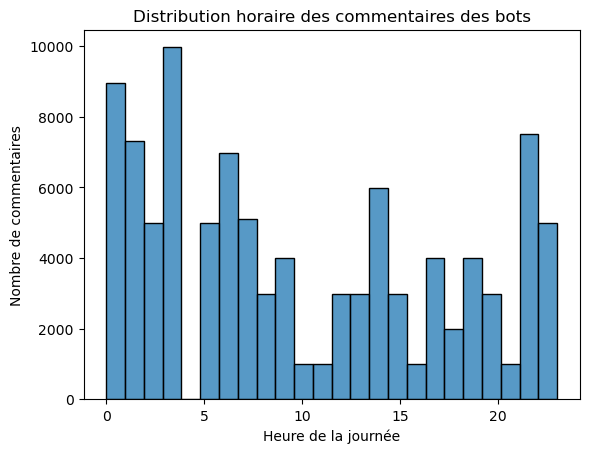

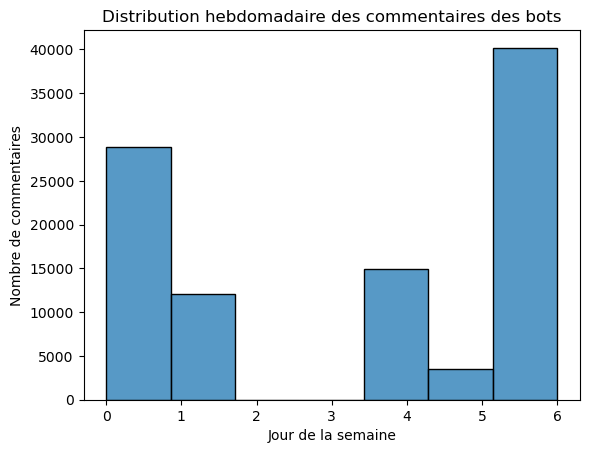

In [49]:
df['Published At'] = pd.to_datetime(df['Published At'])
df['hour'] = df['Published At'].dt.hour
df['day_of_week'] = df['Published At'].dt.dayofweek

sns.histplot(df[df['DEV__IsBotComment']]['hour'], bins=24)
plt.title('Distribution horaire des commentaires des bots')
plt.xlabel('Heure de la journ√©e')
plt.ylabel('Nombre de commentaires')
plt.show()

sns.histplot(df[df['DEV__IsBotComment']]['day_of_week'], bins=7)
plt.title('Distribution hebdomadaire des commentaires des bots')
plt.xlabel('Jour de la semaine')
plt.ylabel('Nombre de commentaires')
plt.show()

### Analyse des similitudes des textes

/Users/user/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


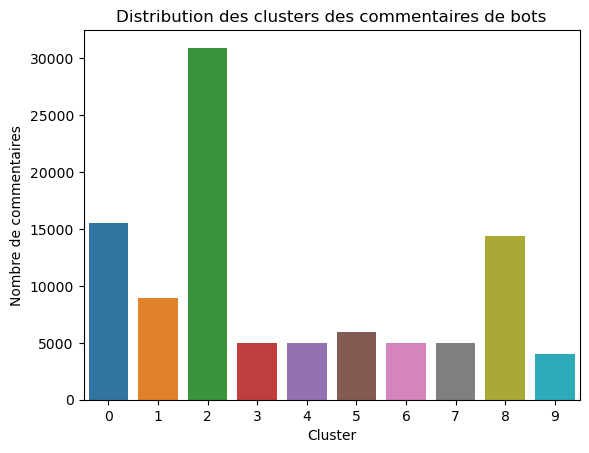

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(df['Comment'])

kmeans = KMeans(n_clusters=10, random_state=0).fit(X)
df['cluster'] = kmeans.labels_

sns.countplot(x='cluster', data=df[df['DEV__IsBotComment']])
plt.title('Distribution des clusters des commentaires de bots')
plt.xlabel('Cluster')
plt.ylabel('Nombre de commentaires')
plt.show()

### Exploration des biais

In [53]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=10, random_state=0)
lda.fit(X)

# Afficher les principaux termes par sujet
terms = vectorizer.get_feature_names_out()
for i, topic in enumerate(lda.components_):
    print(f"Top 10 termes pour le sujet {i}:")
    print(" ".join([terms[i] for i in topic.argsort()[-10:]]))
    print()

Top 10 termes pour le sujet 0:
ÌôîÏù¥ÌåÖ ÏπºÏä® ÌÑ∞Ïª§ great interview jong kim putin professor cia

Top 10 termes pour le sujet 1:
—Ç—ã –º—É–∂—á–∏–Ω–∞ –Ω–∞—Å—Ç–æ—è—â–∏–π deber√≠as visitar cuba jane fonda american wait

Top 10 termes pour le sujet 2:
question slavic interview money instead pride 54 10 interesting peace

Top 10 termes pour le sujet 3:
florida earth canada happen translator obiden doesnt watched states needed

Top 10 termes pour le sujet 4:
peru opener god bless clearly story sure eye love finally

Top 10 termes pour le sujet 5:
minds dollar depends 42 18 war 862 9th century come

Top 10 termes pour le sujet 6:
man watched live interview speak love far tucker watching thank

Top 10 termes pour le sujet 7:
kings plays definitely russian hours interview best end journalist putin

Top 10 termes pour le sujet 8:
interview spent hear explain real time shadowbanned happy youtube history

Top 10 termes pour le sujet 9:
called tucker people president putin interview million know

### Validation crois√©e

In [55]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Exemple : Utilisation d'une r√©gression lin√©aire pour pr√©dire les likes sur les commentaires de bots
X = df_bot_res[['Reply Count', 'DEV__Sentiment__neg', 'DEV__Sentiment__neu', 'DEV__Sentiment__pos', 'DEV__Sentiment__compound']]
y = df_bot_res['Likes']

model = LinearRegression()

# Validation crois√©e avec 5 folds
scores = cross_val_score(model, X, y, cv=5)
print(f"Scores de validation crois√©e : {scores}")
print(f"Moyenne des scores : {scores.mean()}")

Scores de validation crois√©e : [ 5.74365800e-01  8.49750768e-01  5.85257302e-01  2.95046317e-01
 -7.24394943e+02]
Moyenne des scores : -144.4181046604449


### Tests A/B

In [57]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Diviser les donn√©es en deux groupes A et B
group_A = df_bot_res.sample(frac=0.5, random_state=0)
group_B = df_bot_res.drop(group_A.index)

# Exemple : Comparaison entre deux m√©thodes (Random Forest vs Linear Regression)
X_A = group_A[['Reply Count', 'DEV__Sentiment__neg', 'DEV__Sentiment__neu', 'DEV__Sentiment__pos', 'DEV__Sentiment__compound']]
y_A = group_A['Likes']

X_B = group_B[['Reply Count', 'DEV__Sentiment__neg', 'DEV__Sentiment__neu', 'DEV__Sentiment__pos', 'DEV__Sentiment__compound']]
y_B = group_B['Likes']

model_A = RandomForestRegressor(random_state=0)
model_B = LinearRegression()

model_A.fit(X_A, y_A)
model_B.fit(X_B, y_B)

# √âvaluation des performances sur les groupes A et B
mse_A = mean_squared_error(y_A, model_A.predict(X_A))
mse_B = mean_squared_error(y_B, model_B.predict(X_B))

print(f"Erreur quadratique moyenne (MSE) pour le mod√®le A : {mse_A}")
print(f"Erreur quadratique moyenne (MSE) pour le mod√®le B : {mse_B}")

# Comparaison des r√©sultats
if mse_A < mse_B:
    print("Le mod√®le A est meilleur que le mod√®le B.")
else:
    print("Le mod√®le B est meilleur que le mod√®le A.")

Erreur quadratique moyenne (MSE) pour le mod√®le A : 2603.0758414282222
Erreur quadratique moyenne (MSE) pour le mod√®le B : 3320.445459377143
Le mod√®le A est meilleur que le mod√®le B.
